How many earthquake locations to show? 5


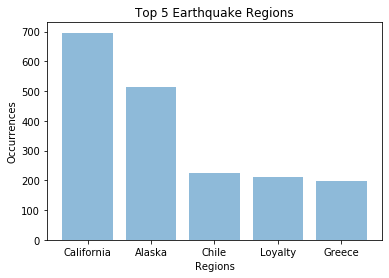

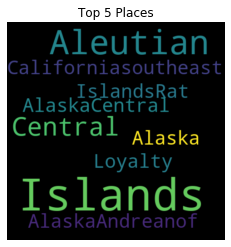

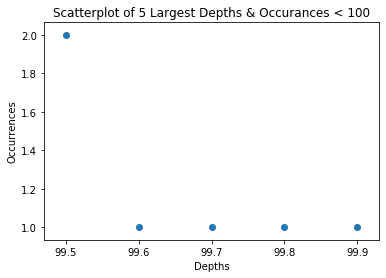

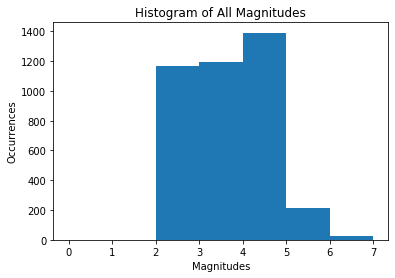

In [119]:
%matplotlib inline
# add necessary import statements
import sys
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud


# ADD input validation to make sure an integer between 1 and 20 is provided
# Program should repeat request for a number OR exit if invalid input is provided
def validate_user_input(howmany, min, max):
    try:
        howmany = int(howmany)
        if(howmany >= min and howmany <= max):
            return howmany
        return 0
        print("Value out of bounds.")
    except ValueError:
        sys.exit("You have entered an invalid input. ")

while True:
    howmany = input(("How many earthquake locations to show? "))
    howmany = validate_user_input(howmany, 1, 20)
    if howmany > 0: break
    
# connect to the output database and name it earthquakes.sqlite 
conn = sqlite3.connect('earthquakes.sqlite')

# forces database to return strings for TEXT attributes 
conn.text_factory = str 
# get the cursor for the connection 
cur = conn.cursor()

# run select query on database to get data for statistics
cur.execute('''SELECT id, magnitude, time, depth, place, title, felt, region 
           FROM earthquakes''')

# set up variables to hold database data
# will be counting earthquakes by place/region
# will just be storing data about magnitude, felt and tsunami 
placecounts = dict()
regioncounts = dict()
mag = []
felt = []
depth = []

for quake in cur :
    # Get data from cursor and add to lists or dictionary
    # Dictionaries will hold counts, Lists will append data
    placecounts[quake[4]] = placecounts.get(quake[4], 0) + 1
    regioncounts[quake[7]] = regioncounts.get(quake[7], 0) + 1
    mag.append(quake[1])
    felt.append(quake[6])
    depth.append(quake[3])

# Plot of 'howmany' regions as a bar chart
y = sorted(regioncounts, key=regioncounts.get, reverse=True)
chart_regions = {}
for z in y[:howmany]:
    chart_regions.update({z:regioncounts[z]})
    if regioncounts[z] < 10 : break
region_list = list(chart_regions.values())
        
plt.bar(np.arange(len(y[:howmany])), region_list, align='center', alpha=0.5)
plt.xticks(np.arange(len(y[:howmany])), y[:howmany])
plt.xlabel('Regions')
plt.ylabel('Occurrences')
plt.title('Earthquake Regions')
plt.title('Top {} Earthquake Regions'.format(howmany))
plt.savefig('barchart.png')
plt.show()


# Wordcloud of top places
x = sorted(placecounts, key=placecounts.get, reverse=True)
x = x[:howmany]
x = ''.join(x)
wordcloud = WordCloud(width=480, height=480, margin=0).generate(x)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Top {} Places'.format(howmany))
plt.savefig('wordcloud.png')
plt.show()

# Scatterplot for all earthquake depths
depthF = np.array(depth)
filterD = np.array(depthF < 100)
depthF = depthF[filterD]
sort_depthF = np.argsort(depthF)
sort_depthF = sort_depthF[::-1]
depthF = depthF[sort_depthF]
unique_depth, counts_depth = np.unique(depthF, return_counts=True)
unique_depth = unique_depth[::-1]
counts_depth = counts_depth[::-1]
plt.scatter(unique_depth[:howmany],counts_depth[:howmany])
plt.title('Scatterplot of {} Largest Depths & Occurances < 100'.format(howmany))
plt.ylabel('Occurrences')
plt.xlabel('Depths')
plt.savefig('scatter.png')
plt.show()

# Histogram of magnitudes; did not use howmany because dataset would be too small
plt.hist(mag, bins=[0,1,2,3,4,5,6,7])
plt.title('Histogram of All Magnitudes')
plt.xlabel('Magnitudes')
plt.ylabel('Occurrences')
plt.savefig('histogram.png')
plt.show()
